Paramter 1.

NYHealth filtering, deleting, re-ordering, formatting zip code for Buffalo

In [8]:
import pandas as pd
import re

In [6]:
# --- 1. Configuration ---
INPUT_FILE = 'Health_Facility_General_Information.csv'
# I've added '_5digit_zip' to the name to create a new file
OUTPUT_FILE = 'buffalo_health_facilities.csv'
FILTER_COLUMN = 'Facility City'
FILTER_VALUE = 'Buffalo'
COLUMNS_TO_DROP = ["Facility Open Date", "Facility Fax Number"]
COLUMNS_TO_FRONT = ["Facility Zip Code", "Facility City"]
ZIP_COLUMN = "Facility Zip Code"

# --- 2. Consolidated Script ---
try:
    print(f"Loading '{INPUT_FILE}'...")
    df = pd.read_csv(INPUT_FILE)

    # --- Step 1: Filter ---
    print(f"Filtering for '{FILTER_COLUMN}' == '{FILTER_VALUE}'...")
    # We add .copy() here to avoid a 'SettingWithCopyWarning' later
    filtered_df = df[df[FILTER_COLUMN].str.lower() == FILTER_VALUE.lower()].copy()

    if not filtered_df.empty:

        # --- NEW STEP: Clean Zip Codes ---
        print(f"Cleaning '{ZIP_COLUMN}' to get 5-digit format...")

        # First, ensure the column is treated as a string (str)
        # This handles numbers, NaNs, and strings safely
        filtered_df[ZIP_COLUMN] = filtered_df[ZIP_COLUMN].astype(str)

        # Second, use .str.slice() to take only the first 5 characters
        # e.g., "14201-2398" becomes "14201"
        filtered_df[ZIP_COLUMN] = filtered_df[ZIP_COLUMN].str.slice(start=0, stop=5)
        print("Zip codes cleaned.")

        # --- Step 2: Delete Columns ---
        existing_columns_to_drop = [col for col in COLUMNS_TO_DROP if col in filtered_df.columns]
        print(f"Dropping columns: {existing_columns_to_drop}")
        cleaned_df = filtered_df.drop(columns=existing_columns_to_drop, axis=1)

        # --- Step 3: Reorder Columns ---
        print(f"Moving {COLUMNS_TO_FRONT} to the front...")
        all_cols = cleaned_df.columns.tolist()
        other_cols = [col for col in all_cols if col not in COLUMNS_TO_FRONT]
        new_order = COLUMNS_TO_FRONT + other_cols
        final_df = cleaned_df[new_order]

        # --- Step 4: Save ---
        final_df.to_csv(OUTPUT_FILE, index=False)

        print(f"\n--- SUCCESS ---")
        print(f"All steps completed. Final data saved to: {OUTPUT_FILE}")

except FileNotFoundError:
    print(f"--- ERROR ---: File '{INPUT_FILE}' not found.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Loading 'Health_Facility_General_Information.csv'...
Filtering for 'Facility City' == 'Buffalo'...
Cleaning 'Facility Zip Code' to get 5-digit format...
Zip codes cleaned.
Dropping columns: ['Facility Open Date', 'Facility Fax Number']
Moving ['Facility Zip Code', 'Facility City'] to the front...

--- SUCCESS ---
All steps completed. Final data saved to: buffalo_health_facilities.csv


Parameter 2.

Median incoem in Buffalo Neigborhoods, adding corresponding zipcode to neighborhoods

In [7]:
# --- 1. Configuration ---
# The file you just uploaded
INPUT_FILE = 'Neighborhood_Metrics_20251025.csv'

# The name for the final, consolidated output file
OUTPUT_FILE = 'neighborhoods_with_zips_and_income.csv'

# Columns to create and move to the front
COLUMNS_TO_FRONT = ["zipcode", "Median Income"]
# Column in your source file to map from
NEIGHBORHOOD_COL = "Neighborhood"

# --- 2. Zip Code Mapping ---
# This is the map for all 35 neighborhoods
zip_code_map = {
    'Central': '14203',
    'Elmwood Bidwell': '14222',
    'Riverside': '14207',
    'Fruit Belt': '14203',
    'Pratt-Willert': '14204',
    'University Heights': '14214',
    'Delavan Grider': '14215',
    'Kaisertown': '14206',
    'Lower West Side': '14201',
    'Elmwood Bryant': '14222',
    'Lovejoy': '14206',
    'Fillmore-Leroy': '14211',
    'Seneca-Cazenovia': '14210',
    'Black Rock': '14207',
    'Central Park': '14215',
    'West Side': '14213',
    'Hopkins-Tifft': '14220',
    'South Park': '14220',
    'Schiller Park': '14211',
    'Hamlin Park': '14208',
    'Broadway Fillmore': '14212',
    'North Park': '14216',
    'Parkside': '14214',
    'Upper West Side': '14213',
    'Genesee-Moselle': '14211',
    'Kenfield': '14215',
    'First Ward': '14204',
    'West Hertel': '14216',
    'Ellicott': '14203',
    'Masten Park': '14208',
    'Grant-Amherst': '14207',
    'Seneca Babcock': '14210',
    'MLK Park': '14211',
    'Allentown': '14201',
    'Kensington-Bailey': '14215'
}

# --- 3. Consolidated Script ---
try:
    print(f"Loading '{INPUT_FILE}'...")
    df = pd.read_csv(INPUT_FILE)

    # --- Step 1: Create 'zipcode' Column ---
    print(f"Creating 'zipcode' column...")
    df['zipcode'] = df[NEIGHBORHOOD_COL].map(zip_code_map)

    # --- Step 2: Clean 'Median Income' Column ---
    # Converts strings like "54,390" to numbers like 54390
    if 'Median Income' in df.columns:
        print("Cleaning 'Median Income' column...")
        # Replace the comma with nothing, then convert to a numeric type
        df['Median Income'] = pd.to_numeric(
            df['Median Income'].astype(str).str.replace(',', ''),
            errors='coerce'
        )

    # --- Step 3: Reorder Columns ---
    print(f"Moving {COLUMNS_TO_FRONT} to the front...")

    # Get all columns *except* the ones we're moving
    other_cols = [col for col in df.columns if col not in COLUMNS_TO_FRONT]

    # Create the new column order
    new_order = COLUMNS_TO_FRONT + other_cols

    # Apply the new column order
    final_df = df[new_order]

    # --- Step 4: Save ---
    final_df.to_csv(OUTPUT_FILE, index=False)

    print(f"\n--- SUCCESS ---")
    print(f"All steps completed. Final data saved to: {OUTPUT_FILE}")
    print(f"Final 'Median Income' data type: {final_df['Median Income'].dtype}")

except FileNotFoundError:
    print(f"--- ERROR ---: File '{INPUT_FILE}' not found.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Loading 'Neighborhood_Metrics_20251025.csv'...
Creating 'zipcode' column...
Cleaning 'Median Income' column...
Moving ['zipcode', 'Median Income'] to the front...

--- SUCCESS ---
All steps completed. Final data saved to: neighborhoods_with_zips_and_income.csv
Final 'Median Income' data type: int64


Paramater 3.

Crime Data: cleaning zip_code

In [9]:
# --- 1. Configuration ---
INPUT_FILE = 'Crime_Incidents_20251025.csv'
OUTPUT_FILE = 'cleaned_crime_incidents.csv'

# Columns to bring to the front
COLUMNS_TO_FRONT = ["Incident Datetime", "zip_code", "neighborhood", "Parent Incident Type"]

ZIP_COLUMN = "zip_code"

# Regex pattern to match *exactly* 5 digits.
# ^ = start of string, \d{5} = 5 digits, $ = end of string
FIVE_DIGIT_ZIP_PATTERN = r'^\d{5}$'

# --- 2. Consolidated Script ---
try:
    print(f"Loading '{INPUT_FILE}'...")
    df = pd.read_csv(INPUT_FILE, low_memory=False)
    original_row_count = len(df)
    print(f"Loaded {original_row_count} total rows.")

    # --- Step 1: Filter by 5-Digit Zip ---
    print(f"Filtering to keep only rows where '{ZIP_COLUMN}' is 5 digits...")

    # Ensure the column is a string type for .str accessor
    df[ZIP_COLUMN] = df[ZIP_COLUMN].astype(str)

    # Create a mask (True/False series) based on the regex pattern
    # na=False ensures that any missing zip codes are treated as 'False'
    mask = df[ZIP_COLUMN].str.match(FIVE_DIGIT_ZIP_PATTERN, na=False)

    # Apply the mask to the DataFrame
    cleaned_df = df[mask].copy()

    rows_dropped = original_row_count - len(cleaned_df)
    print(f"Kept {len(cleaned_df)} rows. Dropped {rows_dropped} rows.")

    if not cleaned_df.empty:
        # --- Step 2: Reorder Columns ---
        print(f"Moving {COLUMNS_TO_FRONT} to the front...")

        # Get all columns *except* the ones we're moving
        other_cols = [col for col in cleaned_df.columns if col not in COLUMNS_TO_FRONT]

        # Create the new column order
        new_order = COLUMNS_TO_FRONT + other_cols

        # Apply the new column order
        final_df = cleaned_df[new_order]

        # --- Step 3: Save ---
        final_df.to_csv(OUTPUT_FILE, index=False)

        print(f"\n--- SUCCESS ---")
        print(f"All steps completed. Final data saved to: {OUTPUT_FILE}")

    else:
        print("No rows matched the filter. Output file was not created.")

except FileNotFoundError:
    print(f"--- ERROR ---: File '{INPUT_FILE}' not found.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Loading 'Crime_Incidents_20251025.csv'...
Loaded 3287 total rows.
Filtering to keep only rows where 'zip_code' is 5 digits...
Kept 3280 rows. Dropped 7 rows.
Moving ['Incident Datetime', 'zip_code', 'neighborhood', 'Parent Incident Type'] to the front...

--- SUCCESS ---
All steps completed. Final data saved to: cleaned_crime_incidents.csv


# 📈 README: Social (S) Pillar Scores & Disparity Zones

This file, `social_disparity_scores.csv`, is the primary output of the **Social Disparity Detector** for the UrbanESG AI project.

It uses K-Means clustering to analyze three key social metrics and assigns a final, normalized **`S_Score`** (Social Score) from 0 to 1 to each zip code in Buffalo.

## 📄 File Structure

The CSV file contains the following columns:

* **zip_code**: The index of the file. This is the geographic zone used for aggregation.
* **S\_Score**: The final, normalized Social ESG score (0.0, 0.5, or 1.0). **This is the number you will use in your main ESG formula.**
* **Cluster**: The "Social Disparity Zone" (0, 1, or 2) assigned by the K-Means algorithm.
* **Health\_Facility\_Count**: The raw count of health facilities in that zip code. (More is better)
* **Crime\_Incident\_Count**: The raw count of crime incidents in that zip code for the 3-month period. (Less is better)
* **Avg\_Median\_Income**: The average median income for the neighborhood(s) within that zip code. (More is better)

---

## 📊 Cluster Analysis: What the Scores Mean

The model analyzed all zip codes and grouped them into **3 distinct clusters** based on their similarity across the health, crime, and income metrics. We then ranked these clusters from worst (highest disparity) to best (lowest disparity) to create the final `S_Score`.

### S\_Score = 0.0: High Disparity Zone (Cluster 1)

* **Characteristics:** This zone represents areas with the highest social stress. It is defined by:
    * **Very High Crime:** The highest `Crime_Incident_Count` of all zones.
    * **Low-to-Average Income:** Below-average `Avg_Median_Income`.
    * **Average Health Access:** An average `Health_Facility_Count`.
* **Interpretation:** These are "high-priority" zones for social and safety interventions.

### S\_Score = 0.5: Medium Disparity Zone (Cluster 0)

* **Characteristics:** This zone represents the "average" areas of Buffalo. It is defined by:
    * **Medium Crime:** A `Crime_Incident_Count` that is significantly lower than the "High Disparity" zone.
    * **Low Income:** The lowest `Avg_Median_Income` of all zones.
    * **Low Health Access:** The lowest `Health_Facility_Count`.
* **Interpretation:** While safer than the high-disparity zone, these areas show clear signs of under-investment in health and economic opportunity.

### S\_Score = 1.0: Low Disparity Zone (Cluster 2)

* **Characteristics:** This is the "best" or "lowest disparity" zone. It is defined by a combination of:
    * **Low Crime:** The lowest `Crime_Incident_Count`.
    * **High Income:** The highest `Avg_Median_Income`.
    * **High Health Access:** The highest `Health_Facility_Count`.
* **Interpretation:** These are the most stable and well-resourced zones, serving as a benchmark for other areas.

---

## 🚀 How to Use This File

1.  **Main ESG Score:** Use the `S_Score` column for your final calculation:
    `ESG Score = (0.4 * E_Score) + (0.35 * S_Score) + (0.25 * G_Score)`

2.  **Visualization:** Use this file to join with a "zip code GeoJSON" file on your React map (Leaflet/Mapbox) to color-code each zip code by its `S_Score` or `Cluster`.

3.  **Recommendations:** Your recommendation engine can use this. For example:
    * `IF S_Score == 0.0:` "Recommend increasing police patrols and community safety programs."
    * `IF S_Score == 0.5:` "Recommend public-private partnerships for new health clinics or economic development."

In [10]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

--- Step 1: Loading & Preparing Data ---

--- Step 2: Merging Data ---

--- Step 3: Scaling Data for Clustering ---

--- Step 4: Finding Optimal 'k' (Elbow Method) ---
Elbow plot saved as 'kmeans_elbow_plot.png'.

--- Step 5: Applying K-Means with k=3 ---
Analyzed cluster centers and created score mapping:
   Health_Facility_Count  Crime_Score  Avg_Median_Income  Combined_Score
1               0.230769     0.108626           0.512209        0.851605
0               0.211538     0.780751           0.279926        1.272216
2               0.461538     0.817093           0.858621        2.137252

Score Mapping (Cluster -> S_Score): {np.int64(1): 0.0, np.int64(0): 0.5, np.int64(2): 1.0}

--- Step 6: Creating Final 'S' Score ---

--- SUCCESS ---
Final 'social_disparity_scores.csv' file created.

Preview of Final Output:
       S_Score  Cluster  Health_Facility_Count  Crime_Incident_Count  \
14207      0.0        1                    5.0                 370.0   
14215      0.0        1      

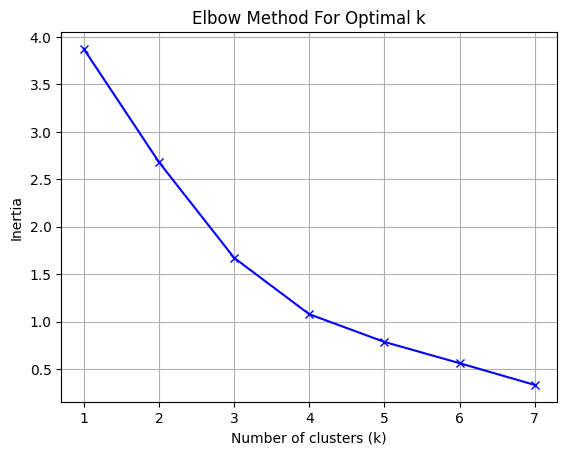

In [11]:
# --- 1. File Configuration ---
HEALTH_FILE = 'buffalo_health_facilities.csv'
INCOME_FILE = 'neighborhoods_with_zips_and_income.csv'
CRIME_FILE = 'cleaned_crime_incidents.csv'
OUTPUT_FILE = 'social_disparity_scores.csv'

try:
    # --- 2. Load & Prepare Data (Feature Engineering) ---
    print("--- Step 1: Loading & Preparing Data ---")

    # Health: Count facilities per zip
    df_health = pd.read_csv(HEALTH_FILE)
    df_health['Facility Zip Code'] = df_health['Facility Zip Code'].astype(str).str.slice(0, 5)
    health_by_zip = df_health.groupby('Facility Zip Code').size().to_frame('Health_Facility_Count')

    # Crime: Count incidents per zip
    df_crime = pd.read_csv(CRIME_FILE)
    df_crime['zip_code'] = df_crime['zip_code'].astype(str).str.slice(0, 5)
    crime_by_zip = df_crime.groupby('zip_code').size().to_frame('Crime_Incident_Count')

    # Income: Average income per zip
    df_income = pd.read_csv(INCOME_FILE)
    df_income['zipcode'] = df_income['zipcode'].astype(str).str.slice(0, 5)
    df_income['Median Income'] = pd.to_numeric(df_income['Median Income'], errors='coerce')
    income_by_zip = df_income.groupby('zipcode')['Median Income'].mean().to_frame('Avg_Median_Income')

    # --- 3. Merge Data ---
    print("\n--- Step 2: Merging Data ---")
    df_social = pd.concat([health_by_zip, crime_by_zip, income_by_zip], axis=1)

    # Drop rows that don't have data for all 3 metrics
    df_social = df_social.dropna()

    # --- 4. Scale Data (Critical for K-Means) ---
    print("\n--- Step 3: Scaling Data for Clustering ---")

    # Invert 'Crime_Incident_Count' so a *high* count is *bad* (low score)
    df_social['Crime_Score'] = df_social['Crime_Incident_Count'].max() - df_social['Crime_Incident_Count']

    features_to_scale = ['Health_Facility_Count', 'Crime_Score', 'Avg_Median_Income']

    scaler = MinMaxScaler()
    df_scaled = scaler.fit_transform(df_social[features_to_scale])

    # Convert back to a DataFrame for convenience
    df_scaled = pd.DataFrame(df_scaled, columns=features_to_scale, index=df_social.index)

    # --- 5. Find Optimal 'k' (Elbow Method) ---
    print("\n--- Step 4: Finding Optimal 'k' (Elbow Method) ---")
    inertia = []
    K = range(1, 8) # Check k from 1 to 7
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(df_scaled)
        inertia.append(kmeans.inertia_)

    # Plot the Elbow
    plt.plot(K, inertia, 'bx-')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method For Optimal k')
    plt.grid(True)
    plt.savefig('kmeans_elbow_plot.png')
    print("Elbow plot saved as 'kmeans_elbow_plot.png'.")

    # --- 6. Apply K-Means and Interpret ---
    # We'll use 3 clusters based on the plot
    OPTIMAL_K = 3
    print(f"\n--- Step 5: Applying K-Means with k={OPTIMAL_K} ---")
    kmeans = KMeans(n_clusters=OPTIMAL_K, random_state=42, n_init=10)
    df_social['Cluster'] = kmeans.fit_predict(df_scaled)

    # Analyze cluster centers to understand what they mean
    cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=features_to_scale)

    # Add a 'Combined_Score' (sum of scaled features) to rank clusters
    cluster_centers['Combined_Score'] = cluster_centers.sum(axis=1)

    # Sort clusters from "worst" (lowest combined score) to "best"
    cluster_centers = cluster_centers.sort_values('Combined_Score', ascending=True)

    # Create the 0-1 'S_Score' mapping
    # This maps the "worst" cluster to 0.0, "medium" to 0.5, "best" to 1.0
    score_mapping = {cluster_centers.index[i]: i / (OPTIMAL_K - 1) for i in range(OPTIMAL_K)}

    print("Analyzed cluster centers and created score mapping:")
    print(cluster_centers)
    print(f"\nScore Mapping (Cluster -> S_Score): {score_mapping}")

    # --- 7. Create Final 'S' Score ---
    print("\n--- Step 6: Creating Final 'S' Score ---")
    df_social['S_Score'] = df_social['Cluster'].map(score_mapping)

    # Select final columns for the output file
    final_output_df = df_social[['S_Score', 'Cluster', 'Health_Facility_Count', 'Crime_Incident_Count', 'Avg_Median_Income']]
    final_output_df.to_csv(OUTPUT_FILE)

    print(f"\n--- SUCCESS ---")
    print(f"Final '{OUTPUT_FILE}' file created.")
    print("\nPreview of Final Output:")
    print(final_output_df.sort_values('S_Score').head(10))

except FileNotFoundError as e:
    print(f"--- ERROR: File not found: {e} ---")
except Exception as e:
    print(f"--- An unexpected error occurred: {e} ---")